## Adam Curry Week 6
### Assignment 6.1
Using section 5.1 in Deep Learning with Python as a guide (listing 5.3 in particular), create a ConvNet model that classifies images in the MNIST digit dataset. Save the model, predictions, metrics, and validation plots in the dsc650/assignments/assignment06/results directory. If you are using JupyterHub, you can include those plots in your Jupyter notebook.

In [1]:
from keras import layers
from keras import models

# produce the initial dimensions of the convnet
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [3]:
#display architecture
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [4]:
#Flatten 3D outputs
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [5]:
#display architecture
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [6]:
# train the convnet on image data
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [7]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
844/844 [==============================] - 14s 16ms/step - loss: 0.4259 - accuracy: 0.8635 - val_loss: 0.0451 - val_accuracy: 0.9857
Epoch 2/5
844/844 [==============================] - 12s 14ms/step - loss: 0.0510 - accuracy: 0.9843 - val_loss: 0.0465 - val_accuracy: 0.9853
Epoch 3/5
844/844 [==============================] - 11s 13ms/step - loss: 0.0334 - accuracy: 0.9898 - val_loss: 0.0352 - val_accuracy: 0.9898
Epoch 4/5
844/844 [==============================] - 11s 13ms/step - loss: 0.0234 - accuracy: 0.9921 - val_loss: 0.0332 - val_accuracy: 0.9907
Epoch 5/5
844/844 [==============================] - 11s 14ms/step - loss: 0.0175 - accuracy: 0.9945 - val_loss: 0.0387 - val_accuracy: 0.9917


In [8]:
model.save('Convnet_MNIST_digit.h5')

In [9]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.0261 - accuracy: 0.9916


In [10]:
test_acc

0.991599977016449

In [11]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

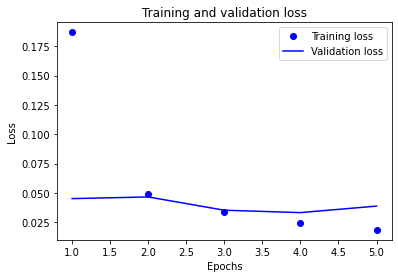

In [12]:
import matplotlib.pyplot as plt

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

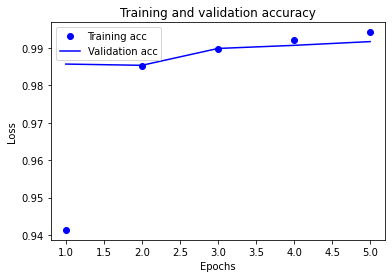

In [13]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [14]:
from pathlib import Path
import os

current_dir = Path(os.getcwd()).absolute()
results_dir = current_dir.joinpath('results')
model.save(results_dir.joinpath('results.h5'))

### Assignment 6.2 
#### Assignment 6.2.a
Using section 5.2 in Deep Learning with Python as a guide, create a ConvNet model that classifies images CIFAR10 small images classification dataset. Do not use dropout or data-augmentation in this part. Save the model, predictions, metrics, and validation plots in the dsc650/assignments/assignment06/results directory. If you are using JupyterHub, you can include those plots in your Jupyter notebook.

In [1]:
# credit Anthony LaRosa for the assist on work
# also utilized some code from: 
#https://www.kaggle.com/amyjang/tensorflow-cifar10-cnn-tutorial
from keras.preprocessing import image
import tensorflow as tf
from keras.datasets import cifar10
from keras.utils import to_categorical 
from keras import layers
from keras import models

In [2]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0

In [4]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [5]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [6]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
704/704 [==============================] - 14s 18ms/step - loss: 1.8664 - accuracy: 0.3222 - val_loss: 1.3550 - val_accuracy: 0.5072
Epoch 2/5
704/704 [==============================] - 12s 16ms/step - loss: 1.2426 - accuracy: 0.5624 - val_loss: 1.3967 - val_accuracy: 0.5066
Epoch 3/5
704/704 [==============================] - 12s 17ms/step - loss: 1.0266 - accuracy: 0.6415 - val_loss: 1.0904 - val_accuracy: 0.6220
Epoch 4/5
704/704 [==============================] - 11s 16ms/step - loss: 0.8677 - accuracy: 0.6974 - val_loss: 1.0873 - val_accuracy: 0.6166
Epoch 5/5
704/704 [==============================] - 11s 16ms/step - loss: 0.7651 - accuracy: 0.7370 - val_loss: 1.1443 - val_accuracy: 0.6126


In [8]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

313/313 [==============================] - 2s 5ms/step - loss: 1.1751 - accuracy: 0.6029


0.6029000282287598

In [12]:
x_val = train_images[:30000]
partial_x_train = train_images[30000:]
y_val = train_labels[:30000]
partial_y_train = train_labels[30000:]

In [13]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   steps_per_epoch=100,
                   epochs=20,
                   validation_data=(x_val,y_val),
                   validation_steps=50)

Epoch 1/20
100/100 [==============================] - 6s 59ms/step - loss: 0.6798 - accuracy: 0.7652 - val_loss: 0.6790 - val_accuracy: 0.7569
Epoch 2/20
100/100 [==============================] - 5s 51ms/step - loss: 0.6144 - accuracy: 0.7869 - val_loss: 0.5835 - val_accuracy: 0.7965
Epoch 3/20
100/100 [==============================] - 5s 51ms/step - loss: 0.5519 - accuracy: 0.8084 - val_loss: 0.5768 - val_accuracy: 0.7979
Epoch 4/20
100/100 [==============================] - 5s 50ms/step - loss: 0.4962 - accuracy: 0.8284 - val_loss: 0.7394 - val_accuracy: 0.7508
Epoch 5/20
100/100 [==============================] - 5s 50ms/step - loss: 0.4436 - accuracy: 0.8498 - val_loss: 0.6151 - val_accuracy: 0.7866
Epoch 6/20
100/100 [==============================] - 5s 50ms/step - loss: 0.3960 - accuracy: 0.8655 - val_loss: 0.5960 - val_accuracy: 0.7927
Epoch 7/20
100/100 [==============================] - 5s 50ms/step - loss: 0.3488 - accuracy: 0.8830 - val_loss: 0.6401 - val_accuracy: 0.7852

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

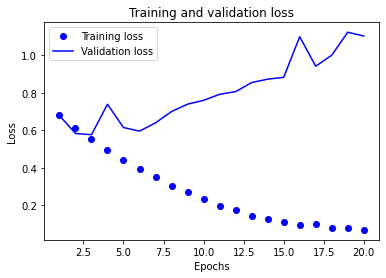

In [15]:
import matplotlib.pyplot as plt

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

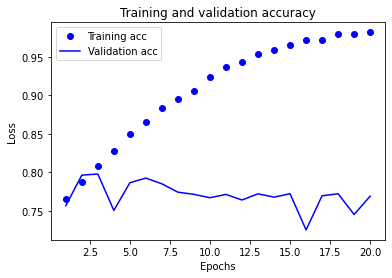

In [16]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

#### Assignment 6.2.b
Using section 5.2 in Deep Learning with Python as a guide, create a ConvNet model that classifies images CIFAR10 small images classification dataset. This time includes dropout and data-augmentation. Save the model, predictions, metrics, and validation plots in the dsc650/assignments/assignment06/results directory. If you are using JupyterHub, you can include those plots in your Jupyter notebook.

In [30]:
from pathlib import Path
import os, shutil

current_dir = Path(os.getcwd()).absolute()

In [34]:
# The path to the directory where the original
# dataset was uncompressed
original_dataset_dir = '/home/jovyan/dsc650/dsc650/assignments/assignment06'

# The directory where we will
# store our smaller dataset
base_dir = '/home/jovyan/dsc650/dsc650/assignments/assignment06/cats_and_dogs_small'
os.mkdir(base_dir)

# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# Directory with our validation cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# Directory with our validation dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

#manually placed images in folders

In [48]:
# using prior data set and model
from keras.preprocessing.image import ImageDataGenerator
import os
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

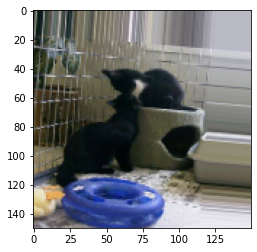

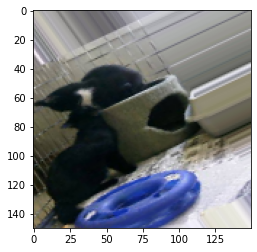

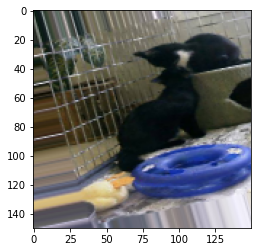

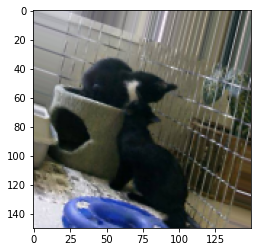

In [49]:
# This is module with image preprocessing utilities
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

# We pick one image to "augment"
img_path = fnames[3]

# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))

# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)

# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [60]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [61]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 512)              

In [62]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [66]:
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
704/704 [==============================] - 13s 19ms/step - loss: 0.2290 - acc: 0.4671 - val_loss: 0.2328 - val_acc: 0.4656
Epoch 2/5
704/704 [==============================] - 13s 19ms/step - loss: 0.2233 - acc: 0.4863 - val_loss: 0.2277 - val_acc: 0.4754
Epoch 3/5
704/704 [==============================] - 13s 19ms/step - loss: 0.2184 - acc: 0.5008 - val_loss: 0.2211 - val_acc: 0.4944
Epoch 4/5
704/704 [==============================] - 13s 19ms/step - loss: 0.2138 - acc: 0.5138 - val_loss: 0.2243 - val_acc: 0.4978
Epoch 5/5
704/704 [==============================] - 13s 19ms/step - loss: 0.2099 - acc: 0.5290 - val_loss: 0.2201 - val_acc: 0.4998


In [67]:
model.save('cats_and_dogs_small_2.h5')

In [69]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

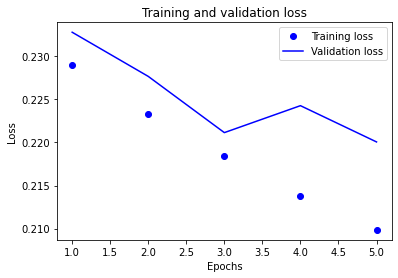

In [70]:
import matplotlib.pyplot as plt

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

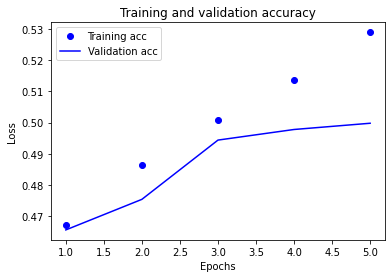

In [71]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

#### Assignment 6.3
Load the ResNet50 model. Perform image classification on five to ten images of your choice. They can be personal images or publically available images. Include the images in dsc650/assignments/assignment06/images/. Save the predictions dsc650/assignments/assignment06/results/predictions/resnet50 directory. If you are using JupyterHub, you can include those plots in your Jupyter notebook.

In [14]:
import numpy as np
import keras
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from keras.applications.resnet50 import preprocess_input
from keras.applications.imagenet_utils import decode_predictions
import matplotlib.pyplot as plt


In [6]:
from pathlib import Path
import os, shutil

current_dir = Path(os.getcwd()).absolute()

In [2]:
resnet_model = resnet50.ResNet50(weights='imagenet')

102973440/102967424 [==============================] - 5s 0us/step


In [17]:
my_images = ['images/bball.PNG','images/elephant1.PNG',
             'images/elephant2.PNG','images/football.PNG',
             'images/iphone.PNG','images/waterbottle.PNG']

In [19]:
def image_fun(path):
    img = image.load_img(path, target_size = (224, 224))
    plt.imshow(img)
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    
    model = keras.applications.ResNet50(weights='imagenet')
    preds = model.predict(img)
    # print the first pred
    print('Predicted:', decode_predictions(preds, top=1)[0])
    print(img)

Predicted: [('n02802426', 'basketball', 0.9987167)]
[[[[ -22.939003  -83.779    -110.68    ]
   [ -21.939003  -89.779    -109.68    ]
   [   2.060997  -77.779    -107.68    ]
   ...
   [ -91.939    -114.779    -120.68    ]
   [ -96.939     -99.779    -112.68    ]
   [ -94.939     -96.779    -109.68    ]]

  [[ -60.939003 -102.779    -123.68    ]
   [ -62.939003 -108.779    -122.68    ]
   [ -47.939003 -101.779    -121.68    ]
   ...
   [ -94.939    -111.779    -116.68    ]
   [ -95.939    -103.779    -113.68    ]
   [ -92.939    -100.779    -110.68    ]]

  [[ -81.939    -105.779    -122.68    ]
   [ -77.939    -101.779    -119.68    ]
   [ -72.939     -99.779    -116.68    ]
   ...
   [ -97.939    -110.779    -113.68    ]
   [ -85.939    -103.779    -109.68    ]
   [ -85.939    -104.779    -110.68    ]]

  ...

  [[ 135.061     122.221     115.32    ]
   [ 135.061     122.221     115.32    ]
   [ 135.061     122.221     115.32    ]
   ...
   [ 135.061     122.221     115.32    ]
   [ 

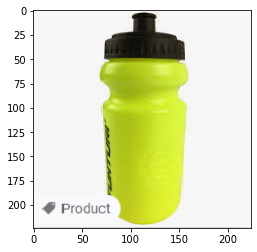

In [20]:
# loop through all images print prediction and results
for i in range(len(my_images)):# borrowed from Teams Samuel Sears
    image_fun(current_dir.joinpath(my_images[i]))